# Exercise 2: Linear Regression
----------
In this exercise, you are going to implement a first machine learning model and get to know the libraries *pandas* and *scikit-learn*.

## Dataset
We will use a data set originally published here: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/9/auto+mpg)

Download the data set from Moodle. The data set consists of two files:
- auto-mpg.data: contains the data
- auto-mpg.names: contains information about the data set

The data set contains data from 398 different car models. This includes, besides the car name, information about:
- fuel consumption in miles per gallon
- cylinders
- engine displacement
- horsepower
- weight
- acceleration
- model year
- origin

The goal of this exercise is to predict the fuel consumption of the cars using the other available attributes as input to a linear regression algorithm.

## Importing Data with *pandas*

The *pandas* library is a very important library often used in data science to handle data sets. It includes functions to analyze, explore and manipulate data.
You can check out information about *pandas* on their website: [https://pandas.pydata.org/docs/index.html](https://pandas.pydata.org/docs/index.html)

When working with data sets in *pandas*, the data is loaded into a pandas DataFrame, which is a two-dimensional structure similar to a table. In general the columns of the DataFrame refer to the different features of the data set while the rows represent the instances of the data. *Pandas* gives you many possibilities to handle and analyze the data in the DataFrame, e.g. to calculate statistical properties or to clean the data.


In [1]:
import pandas as pd

data = {
    "Height": [180, 165, 172, 201, 177],
    "Weight": [80, 56, 105, 102, 68],
    "Name": ['Jack', 'John', 'Oliver', 'George', 'William']
}

# load the data into a data frame
dataframe = pd.DataFrame(data)

print(dataframe)

   Height  Weight     Name
0     180      80     Jack
1     165      56     John
2     172     105   Oliver
3     201     102   George
4     177      68  William


In [2]:
# the info() function gives you a first overview of the data like the number of rows and columns and the data types.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  5 non-null      int64 
 1   Weight  5 non-null      int64 
 2   Name    5 non-null      object
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


In [3]:
# Select a column of the dataframe
print(dataframe['Height'])
# The result of the selection is a Pandas Series, which is a one-dimensional array
print(type(dataframe['Height']))

0    180
1    165
2    172
3    201
4    177
Name: Height, dtype: int64
<class 'pandas.core.series.Series'>


In [4]:
# Select rows and columns of the dataframe using loc
# input to loc are the labels of the data
print(dataframe.loc[0:2,['Weight', 'Name']])

   Weight    Name
0      80    Jack
1      56    John
2     105  Oliver


In [5]:
# select a row of the dataframe using iloc
# iloc uses integer-based indexing
print(dataframe.iloc[0:3,1:3])
# this gives the same output as the code block above

   Weight    Name
0      80    Jack
1      56    John
2     105  Oliver


------

## Task 1: Load data
Load the car data set for this exercise using the read_csv function from pandas and take a first look at the data to ensure it was properly loaded.

In [9]:
# import pandas library
import pandas as pd
data = pd.read_csv('Data_auto_mpg-20231031/auto-mpg.data', delim_whitespace=True, header=None, names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])

data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Task 2: Clean data

As described in the auto-mpg.names file, there are six missing horsepower values within the data set. For this exercise, we are going to ignore the six cars with this missing information. Use pandas to find and delete the six instances with missing horsepower information.

In [11]:
missing_horsepower = data[data['horsepower'] == '?']

data = data.drop(index=missing_horsepower.index)
data['horsepower'] = data['horsepower'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## Task 3: Linear Regression

Your task is to predict the fuel consumption in miles per gallon of the cars. Use the formula for linear regression from the lecture $\beta = (X^{T}X)^{-1}X^{T}y$ to perform this task. Choose the available numeric features cylinders, displacement, horsepower, weight, acceleration, model year and origin as input features.

Calculate the root mean square error of your prediction.

In [15]:
import numpy as np

y = data['mpg']
n = y.size

one_vector = np.ones((n,1))
features = data[['cylinders', 'displacement','horsepower','weight','acceleration','model year', 'origin']]
x = np.append(one_vector,features, axis=1)

beta = np.linalg.inv(x.T @ x) @ x.T @ y

In [23]:
print(beta)

[-1.72184346e+01 -4.93376319e-01  1.98956437e-02 -1.69511442e-02
 -6.47404340e-03  8.05758383e-02  7.50772678e-01  1.42614050e+00]


In [24]:
y_pred = np.matmul(x,beta)

mse = np.square(np.subtract(y,y_pred)).mean()
rmse = np.sqrt(mse)

print('The root mean squared error is {:.2f} mpg'.format(rmse))

The root mean squared error is 3.29 mpg


-------------

## Scikit-Learn

As seen in Task 3, the linear regression model can be easily implemented in Python. For more complex algorithms, it makes sense to use existing libraries. *scikit-learn* is a very helpful library in the field of machine learning. With the help of *scikit-learn*, many machine learning models can be easily implemented. It also contains methods to transform and pre-process data before applying the machine learning algorithm and can be used for evaluation as well.

For example, a linear regression model can be implemented as shown in the following code block.

In [25]:
# import scikit-learn
from sklearn.linear_model import LinearRegression
import numpy as np

# data set
x = np.transpose(np.array([[1,2,3,4,5,6,7,8]]))
y = np.transpose(np.array([3,4.5,5.8,7,10,13,14.6,16]))

# define a linear model and fit it to the given data
lm = LinearRegression(fit_intercept=True).fit(x,y)

# print the coefficients of the linear model
print(lm.intercept_, lm.coef_)

# calculate the predicted values
y_pred = lm.predict(x)

# calculate the root mean square error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y, y_pred, squared=False)
print('The root mean squared error is {:.2f}'.format(rmse))

0.3392857142857153 [1.97738095]
The root mean squared error is 0.63


--------------
## Task 4: Optimization and Evaluation

In this task, we want to compare the results of the classic linear regression that we have already implemented above with the results of a lasso approach. In order to compare the results on unseen data, we have to define a training and a test data set.

a) Use the *scikit-learn* function "train_test_split" to split the data into the two sets. Choose a size of 70% for the training data and 30% for the test data.

In [27]:
from sklearn.model_selection import train_test_split

y = data['mpg']
x = data[['cylinders', 'displacement','horsepower','weight','acceleration','model year', 'origin']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=27)

b) Learn the classic linear regression model on the training data set and evaluate its performance on training and test data set using the root mean square error as evaluation metric.

In [28]:
from sklearn.linear_model import LinearRegression

# create a linear model and fit it to the given data
lin_reg = LinearRegression(fit_intercept=True).fit(x_train,y_train)

# calculate the predicted values
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

# calculate the root mean square error
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print('The root mean squared error on the training set is {:.2f} \n The root mean squared error on the test set is {:.2f}'.format(rmse_train, rmse_test))

The root mean squared error on the training set is 3.25 
 The root mean squared error on the test set is 3.47


c) Learn a linear regression model with lasso regularization on the training data set and evaluate its performance on training and test data set using the root mean square error as evaluation metric. Use the "Lasso" module from *scikit-learn* to perform this task and set the alpha-value to 1. Compare the model coefficients and the performance with the classic linear regression approach from above. Which of the models seems better suited for the given task?

In [29]:
from sklearn.linear_model import Lasso

# create a Lasso model and fit it to the given data
lin_reg = Lasso(fit_intercept=True).fit(x_train,y_train)

# calculate the predicted values
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

# calculate the root mean square error
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print('The root mean squared error on the training set is {:.2f} \n The root mean squared error on the test set is {:.2f}'.format(rmse_train, rmse_test))

The root mean squared error on the training set is 3.42 
 The root mean squared error on the test set is 3.47


In [30]:
print(lin_reg.coef_)

[ 0.          0.00169793 -0.01669805 -0.00641266  0.          0.64193786
  0.        ]


For the train-test-split used in this solution, the performance of the Lasso model and the performance of the linear regression model are equal on the test set. The non-regularized model has a better performance on the training set, but the rmse-score on the test is slightly higher. This indicates a small overfitting. The lasso approach can reduce the overfitting. Here, the scores on test and training data set are closer to each other. On the other hand, it also introduces a small bias caused by the additional model assumptions. As a result, the performances on the test set are equally good.

When looking at the coefficients of the regression, one notes that three of the coefficients in the Lasso model are at 0. The lasso algorithm performs an inherent feature selection and creates a more simple model that only uses the four features displacement, horsepower, weight and model year.

To sum it up, the Lasso regularization does not increase the performance for the data set at hand, but leads to a more simple regression model. This may be desirable in some cases as it can lead to a better explainability of the model.

As the data set is quite small, the results depend a lot on the chosen train-test-split. It might be, that in your case one of the models performs much better than the other. This is only due to the randomness in the split. For a final assessment of the model performances, a larger data set would be needed.

d) Perform a hyperparameter optimization for the lasso approach by trying different values for the hyperparameter alpha. Evaluate the performance and find the alpha value with the best performance.

e:\programms\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
e:\programms\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
e:\programms\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+03, tolerance: 1.570e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_desc

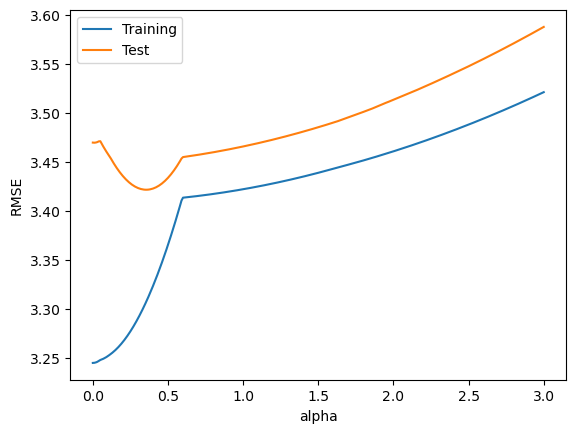

In [31]:
# define several values for the alpha parameter
alpha = np.linspace(0,3,301)

rmse_train = []
rmse_test = []
# loop for training and evaluating the classifiers
for i in alpha:
    lin_reg = Lasso(alpha=i, fit_intercept=True).fit(x_train,y_train)
    y_train_pred = lin_reg.predict(x_train)
    y_test_pred = lin_reg.predict(x_test)
    rmse_train.append(mean_squared_error(y_train, y_train_pred, squared=False))
    rmse_test.append(mean_squared_error(y_test, y_test_pred, squared=False))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(alpha,rmse_train)
plt.plot(alpha,rmse_test)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend(['Training', 'Test'])

In [32]:
# check out the optimal values
min_index = np.argmin(rmse_test)
print('Best alpha: {}'.format(alpha[min_index]))

# linear model and fit it to the given data
lin_reg = Lasso(alpha=alpha[min_index], fit_intercept=True).fit(x_train,y_train)

# calculate the predicted values
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

# calculate the root mean square error
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print('The root mean squared error on the training set is {:.2f} \n The root mean squared error on the test set is {:.2f}'.format(rmse_train, rmse_test))

Best alpha: 0.36
The root mean squared error on the training set is 3.31 
 The root mean squared error on the test set is 3.42


For the train-test-split that was used here, the optimal value for alpha is 0.36. From the plotted curve of the training error, one can see that the bias increases with higher alpha values. At the same time, the variance of the model decreases and the training and test error are closer to each other than with the linear regression approach without regularization (alpha=0). When the value for alpha is chosen too high, the increase in bias is much higher than the decrease in variance and the overall performance gets worse.

In general, there is no clear rule to say which approach is better, as this depends a lot on the given data set.